In [1]:
import sys
import numpy as np 
sys.path.append('../../../src/')
sys.path.append('../../../src/wikidata')
import matplotlib.pyplot as plt
from mask_dataset import MaskedDataset
dataset = MaskedDataset(model_name="mbert", reload=False)

Load pre-saved file /home/xzhao/workspace/probing-mulitlingual/result/dataset-mbert/mlama-dataset.pkl for MaskedDataset instance


Generating wiki-probing matching matrix for analyzing cross-lingual transfer ability: 100%|██████████| 37535/37535 [06:40<00:00, 93.79it/s] 
/tmp/ipykernel_3417004/1966498400.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['language'], rotation=80, fontsize=15)


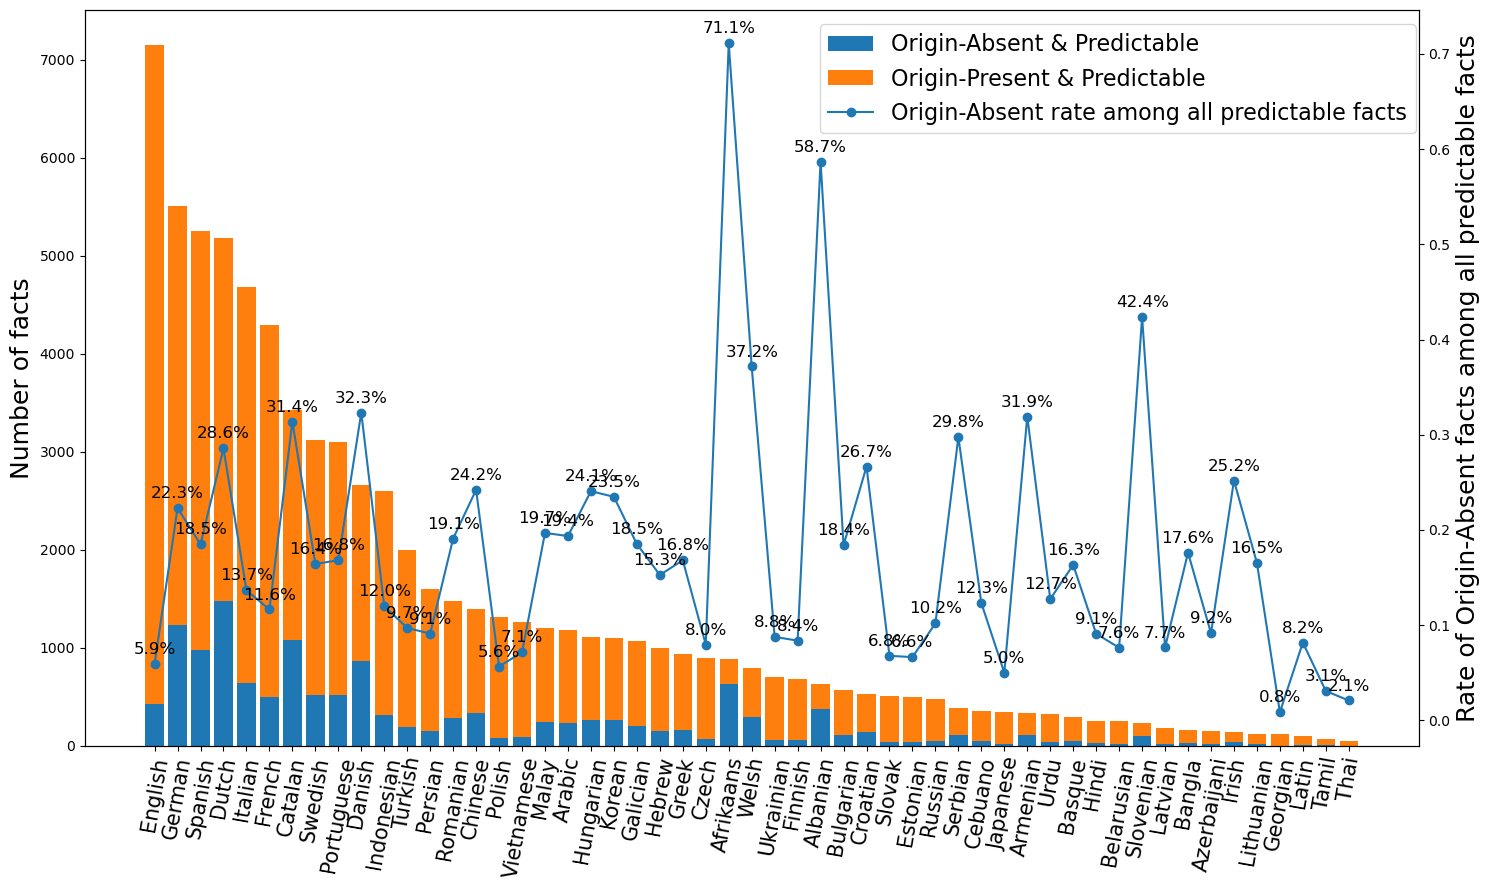

In [2]:
# from wiki_evaluation import get_wiki_matches_matrix_from_dumped_wiki_article, _get_subject_object_cooccurence_in_article
# lang2uuid2matches = _get_subject_object_cooccurence_in_article(dataset, candidate_langs=dataset.langs, reload=True)
# langs, all_uuids, sub_matrix = get_wiki_matches_matrix_from_dumped_wiki_article(dataset, reload=True)
import pandas as pd
from wiki_evaluation import get_wiki_matches_matrix_from_dumped_wiki_article

langs, _, sub_matrix = get_wiki_matches_matrix_from_dumped_wiki_article(dataset)

matched_cnt = np.array([len(np.where(sub_matrix[row_id]>=2)[0]) for row_id in range(len(langs))])
sorted_langs = [langs[idx] for idx in np.argsort(matched_cnt)][::-1]
matrix_info = {}
for lang in sorted_langs:
    row_id = langs.index(lang)
    matrix_info[dataset.display_lang(lang, prefix=False)] = {
        "Not in evaluation dataset": len(np.where(sub_matrix[row_id]==-1)[0]),
        "Has no wiki & Not predicted": len(np.where(sub_matrix[row_id]==0)[0]),
        "Has wiki & Not predicted": len(np.where(sub_matrix[row_id]==1)[0]),
        "Has no wiki & Predicted": len(np.where(sub_matrix[row_id]==2)[0]),
        "Has wiki & Predicted": len(np.where(sub_matrix[row_id]==3)[0])
    }

df = pd.DataFrame(matrix_info).T
df = df.reset_index().rename(columns={'index': 'language'})
df = df.drop(["Not in evaluation dataset"], axis=1)
df = df.drop(["Has no wiki & Not predicted"], axis=1)
df = df.drop(["Has wiki & Not predicted"], axis=1)
df['Rate of no-wiki data'] = df['Has no wiki & Predicted'] / (df['Has no wiki & Predicted'] + df['Has wiki & Predicted'])

fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.bar(df['language'], df['Has no wiki & Predicted'], label='Origin-Absent & Predictable')
ax1.bar(df['language'], df['Has wiki & Predicted'], bottom=df['Has no wiki & Predicted'], label='Origin-Present & Predictable')
# ax1.legend(fontsize=18) 
ax1.tick_params(axis='y')
ax1.set_xticklabels(df['language'], rotation=80, fontsize=15)
ax1.set_ylabel('Number of facts', fontsize=18)

ax2 = ax1.twinx()
ax2.set_ylabel('Rate of Origin-Absent facts among all predictable facts', fontsize=18)
ax2.plot(df['language'], df['Rate of no-wiki data'], marker='o', linestyle='-', label='Origin-Absent rate among all predictable facts')
# ax2.legend(fontsize=18) 
ax2.tick_params(axis='y')
for i, txt in enumerate(df['Rate of no-wiki data']):
    ax2.annotate(f"{txt*100:.1f}%", (df['language'][i], df['Rate of no-wiki data'][i]), fontsize=12, ha='center', va='bottom', xytext=(0,5), textcoords='offset points')


handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# Combine the handles and labels
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc=(0.55, 0.85), fontsize=16)



# ax1.set_title('Distribution of Origin-Absent & Origin-Present among predictable factual knowledge', fontsize=20)
fig.tight_layout()
plt.show()


/tmp/ipykernel_3417004/4230604702.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df['language'], fontsize=11, rotation=30)


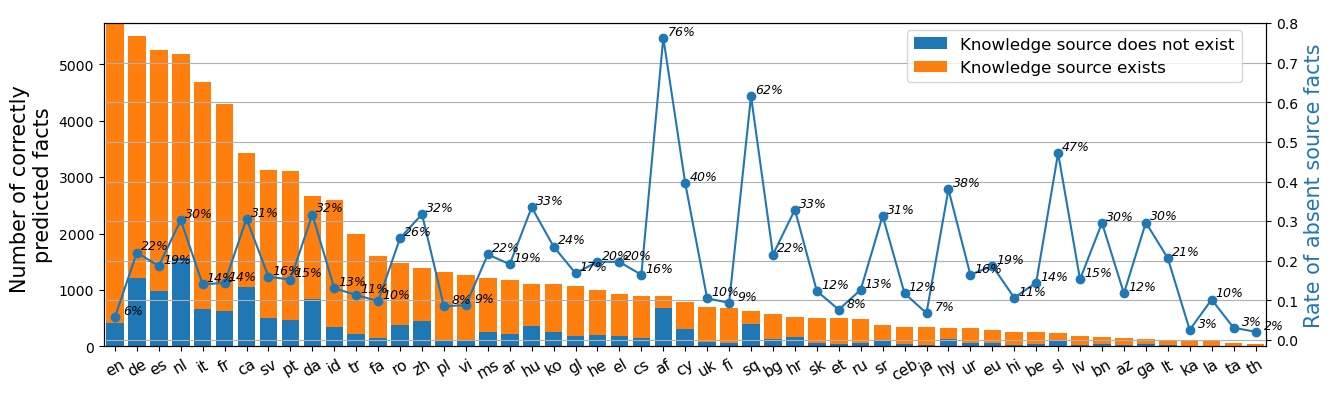

In [3]:
# from wiki_evaluation import get_wiki_matches_matrix_from_dumped_wiki_article, _get_subject_object_cooccurence_in_article
# lang2uuid2matches = _get_subject_object_cooccurence_in_article(dataset, candidate_langs=dataset.langs, reload=True)
# langs, all_uuids, sub_matrix = get_wiki_matches_matrix_from_dumped_wiki_article(dataset, reload=True)
import pandas as pd
from evaluate_tokenized_articles import get_wiki_matches_matrix_from_tokenized_wiki_article
import matplotlib
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True


langs, _, sub_matrix = get_wiki_matches_matrix_from_tokenized_wiki_article(dataset)

matched_cnt = np.array([len(np.where(sub_matrix[row_id]>=2)[0]) for row_id in range(len(langs))])
sorted_langs = [langs[idx] for idx in np.argsort(matched_cnt)][::-1]
matrix_info = {}
for lang in sorted_langs:
    row_id = langs.index(lang)
    matrix_info[lang] = {
        "Not in evaluation dataset": len(np.where(sub_matrix[row_id]==-1)[0]),
        "Has no wiki & Not predicted": len(np.where(sub_matrix[row_id]==0)[0]),
        "Has wiki & Not predicted": len(np.where(sub_matrix[row_id]==1)[0]),
        "Has no wiki & Predicted": len(np.where(sub_matrix[row_id]==2)[0]),
        "Has wiki & Predicted": len(np.where(sub_matrix[row_id]==3)[0])
    }

orange = "#ff7f0e"
blue = "#1f77b4"
df = pd.DataFrame(matrix_info).T
df = df.reset_index().rename(columns={'index': 'language'})
df = df.drop(["Not in evaluation dataset"], axis=1)
df = df.drop(["Has no wiki & Not predicted"], axis=1)
df = df.drop(["Has wiki & Not predicted"], axis=1)
df['Rate of no-wiki data'] = df['Has no wiki & Predicted'] / (df['Has no wiki & Predicted'] + df['Has wiki & Predicted'])

fig, ax1 = plt.subplots(figsize=(15, 4.2))
ax1.bar(df['language'], df['Has no wiki & Predicted'], label='Knowledge source does not exist', color=blue)
ax1.bar(df['language'], df['Has wiki & Predicted'], bottom=df['Has no wiki & Predicted'], label='Knowledge source exists', color=orange)
# ax1.legend(fontsize=18) 
ax1.tick_params(axis='y')
ax1.set_xticklabels(df['language'], fontsize=11, rotation=30)
ax1.set_ylabel('Number of correctly \npredicted facts', fontsize=15)
x = list(range(len(sorted_langs)))
ax1.set_xlim(min(x) - 0.5, max(x) + 0.5)
ax1.set_ylim(0, max(df['Has wiki & Predicted'])*0.85)

ax2 = ax1.twinx()
ax2.set_ylabel('Rate of absent source facts', fontsize=15, color=blue)
ax2.plot(df['language'], df['Rate of no-wiki data'], marker='o', linestyle='-', color=blue)
# ax2.legend(fontsize=18) 
ax2.tick_params(axis='y')
for i, txt in enumerate(df['Rate of no-wiki data']):
    ax2.annotate(f"{txt*100:.0f}%", (df['language'][i], df['Rate of no-wiki data'][i]), 
                 fontsize=9, ha='center', 
                 va='bottom', xytext=(13,0), 
                 style='italic',
                 textcoords='offset points')



handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# Combine the handles and labels
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc=(0.68, 0.79), fontsize=12)


plt.grid(True)
# fig.tight_layout()
# plt.show()
plt.savefig("../../display/figures/absentrate.updated.eps", format="eps", dpi=1000, bbox_inches="tight", pad_inches=0.1, transparent=True)
# plt.savefig("../../../figures/absentrate.transparent.svg", dpi=1000, bbox_inches="tight", pad_inches=0.1, transparent=True)


/tmp/ipykernel_3417004/483603786.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([dataset.display_lang(lang, False) for lang in df['language']], fontsize=11, rotation=20)


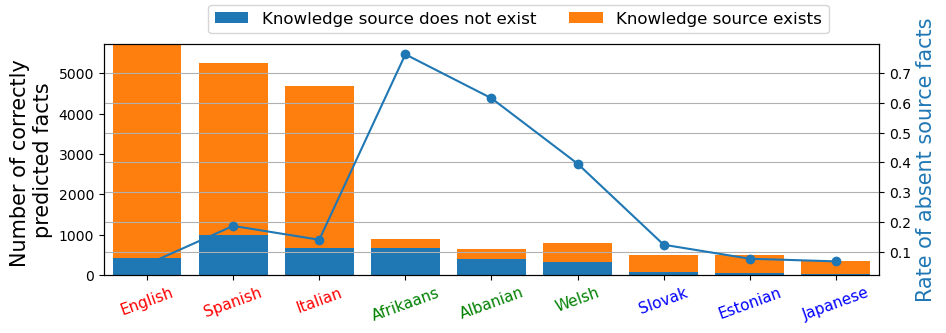

In [4]:
# from wiki_evaluation import get_wiki_matches_matrix_from_dumped_wiki_article, _get_subject_object_cooccurence_in_article
# lang2uuid2matches = _get_subject_object_cooccurence_in_article(dataset, candidate_langs=dataset.langs, reload=True)
# langs, all_uuids, sub_matrix = get_wiki_matches_matrix_from_dumped_wiki_article(dataset, reload=True)
import pandas as pd
from evaluate_tokenized_articles import get_wiki_matches_matrix_from_tokenized_wiki_article
import matplotlib
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True


langs, _, sub_matrix = get_wiki_matches_matrix_from_tokenized_wiki_article(dataset)

matched_cnt = np.array([len(np.where(sub_matrix[row_id]>=2)[0]) for row_id in range(len(langs))])
highlighted_languages1 = [dataset.display_lang(lang, False) for lang in ['en', 'es', 'it']]
highlighted_languages2 = [dataset.display_lang(lang, False) for lang in ['af', 'sq', 'cy']]
highlighted_languages3 = [dataset.display_lang(lang, False) for lang in ['sk', 'et', 'ja']]
# sorted_langs = [langs[idx] for idx in np.argsort(matched_cnt)][::-1]
sorted_langs = ['en', 'es', 'it', 'af', 'sq', 'cy', 'sk', 'et', 'ja']
matrix_info = {}
for lang in sorted_langs:
    row_id = langs.index(lang)
    matrix_info[lang] = {
        "Not in evaluation dataset": len(np.where(sub_matrix[row_id]==-1)[0]),
        "Has no wiki & Not predicted": len(np.where(sub_matrix[row_id]==0)[0]),
        "Has wiki & Not predicted": len(np.where(sub_matrix[row_id]==1)[0]),
        "Has no wiki & Predicted": len(np.where(sub_matrix[row_id]==2)[0]),
        "Has wiki & Predicted": len(np.where(sub_matrix[row_id]==3)[0])
    }
orange = "#ff7f0e"
blue = "#1f77b4"
df = pd.DataFrame(matrix_info).T
df = df.reset_index().rename(columns={'index': 'language'})
df = df.drop(["Not in evaluation dataset"], axis=1)
df = df.drop(["Has no wiki & Not predicted"], axis=1)
df = df.drop(["Has wiki & Not predicted"], axis=1)
df['Rate of no-wiki data'] = df['Has no wiki & Predicted'] / (df['Has no wiki & Predicted'] + df['Has wiki & Predicted'])

fig, ax1 = plt.subplots(figsize=(10, 3))
ax1.bar([dataset.display_lang(lang, False) for lang in df['language']], df['Has no wiki & Predicted'], label='Knowledge source does not exist', color=blue)
ax1.bar([dataset.display_lang(lang, False) for lang in df['language']], df['Has wiki & Predicted'], bottom=df['Has no wiki & Predicted'], label='Knowledge source exists', color=orange)
# ax1.legend(fontsize=18) 
ax1.tick_params(axis='y')
ax1.set_xticklabels([dataset.display_lang(lang, False) for lang in df['language']], fontsize=11, rotation=20)
ax1.set_ylabel('Number of correctly \npredicted facts', fontsize=15)
x = list(range(len(sorted_langs)))
ax1.set_xlim(min(x) - 0.5, max(x) + 0.5)
ax1.set_ylim(0, max(df['Has wiki & Predicted'])*0.85)

ax2 = ax1.twinx()
ax2.set_ylabel('Rate of absent source facts', fontsize=15, color=blue)
ax2.plot([dataset.display_lang(lang, False) for lang in df['language']], df['Rate of no-wiki data'], marker='o', linestyle='-', color=blue)
# ax2.legend(fontsize=18) 
ax2.tick_params(axis='y')
for i, txt in enumerate(df['Rate of no-wiki data']):
    ax2.annotate(f"{txt*100:.0f}%", (df['language'][i], df['Rate of no-wiki data'][i]), 
                 fontsize=9, ha='center', 
                 va='bottom', xytext=(13,0), 
                 style='italic',
                 textcoords='offset points')

for tick in ax1.get_xticklabels():
    if tick.get_text() in highlighted_languages1:
        tick.set_color('r')
        # tick.set_fontweight('bold')
    elif tick.get_text() in highlighted_languages2:
        tick.set_color('g')
    elif tick.get_text() in highlighted_languages3:
        tick.set_color('b')
        

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
# Combine the handles and labels
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc=(0.22, 0.9), fontsize=12, ncol=2)


plt.grid(True)
# fig.tight_layout()
# plt.show()
plt.savefig("../../display/figures/absentrate.updated.eps", format="eps", dpi=1000, bbox_inches="tight", pad_inches=0.1, transparent=True)
# plt.savefig("../../../figures/absentrate.transparent.svg", dpi=1000, bbox_inches="tight", pad_inches=0.1, transparent=True)


In [5]:
df


,language,Has no wiki & Predicted,Has wiki & Predicted,Rate of no-wiki data
0,en,412,6740,0.057606
1,es,982,4275,0.186799
2,it,657,4027,0.140265
3,af,676,210,0.762980
4,sq,389,243,0.615506
5,cy,313,478,0.395702
6,sk,62,440,0.123506
7,et,38,459,0.076459
8,ja,23,317,0.067647
